In [3]:
#DATA CLEANING


import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\vanis\Downloads\netflix_titles.csv\netflix_titles.csv")

# Preview
print(df.shape)
df.head()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Split duration into minutes (movies) and seasons (TV shows)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('Unknown')

# Rename for clarity
df.rename(columns={'listed_in': 'genre'}, inplace=True)

# Final check
df.info()


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  genre          8807 non-null   object        
 11  description    8807 non-null   object        
 12  year_added     8709 non-null   float64       
 13  month_added    8709 non-null   object        
 14  duration_int   8804 non-null   float64       
 15  duration_t

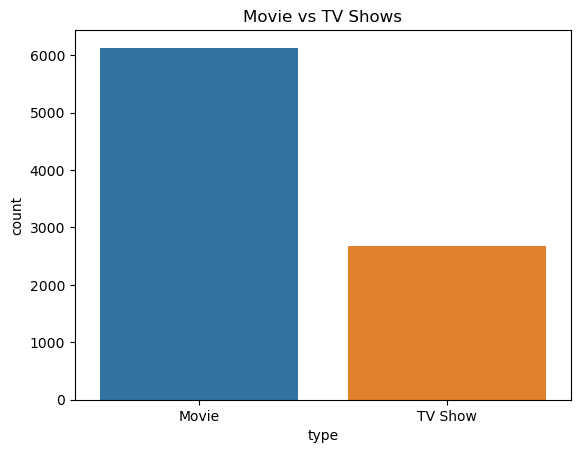

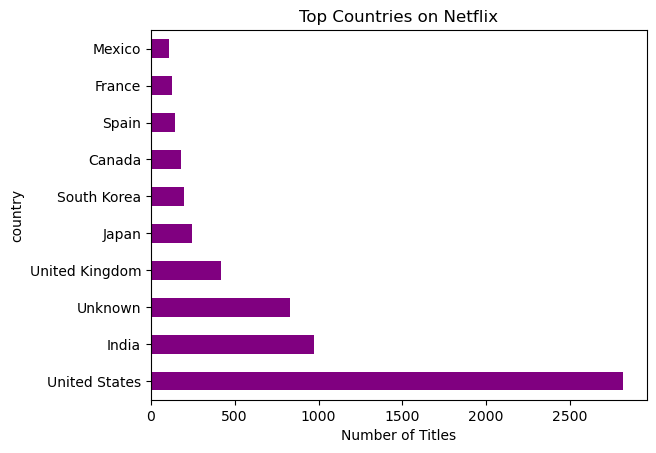

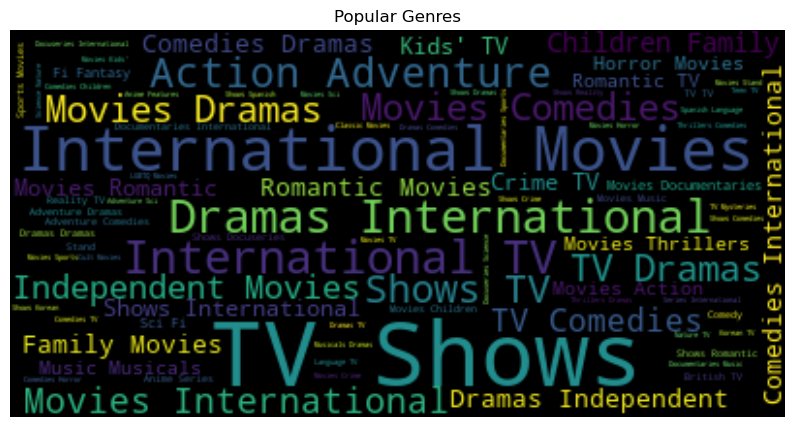

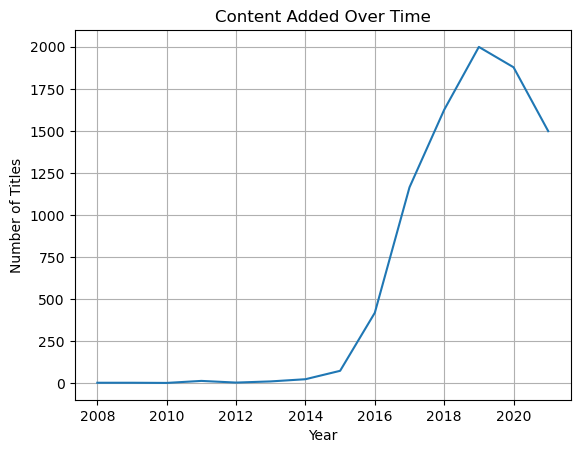

In [4]:
#Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Type count
sns.countplot(data=df, x='type')
plt.title("Movie vs TV Shows")
plt.show()

# Top 10 countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='purple')
plt.title("Top Countries on Netflix")
plt.xlabel("Number of Titles")
plt.show()

# Genre cloud (optional using WordCloud)
from wordcloud import WordCloud
text = " ".join(genre for genre in df.genre.dropna())
wordcloud = WordCloud(background_color="black").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Genres")
plt.show()

# Content added over time
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()
